In [1]:
import requests
import pprint

url = 'https://query.wikidata.org/sparql'
query = """
SELECT ?filmLabel ?logo ?directorLabel WHERE {
  ?film wdt:P31 wd:Q11424.
  ?film wdt:P1476 "Baby Driver"@en. 
  ?film wdt:P154 ?logo.
  ?film wdt:P57 ?director.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
"""
r = requests.get(url, params = {'format': 'json', 'query': query})
data = r.json()
pprint.pprint(data)

{'head': {'vars': ['filmLabel', 'logo', 'directorLabel']},
 'results': {'bindings': [{'directorLabel': {'type': 'literal',
                                             'value': 'Edgar Wright',
                                             'xml:lang': 'en'},
                           'filmLabel': {'type': 'literal',
                                         'value': 'Baby Driver',
                                         'xml:lang': 'en'},
                           'logo': {'type': 'uri',
                                    'value': 'http://commons.wikimedia.org/wiki/Special:FilePath/Logo%20Baby%20Driver%20rosa.svg'}}]}}


In [13]:
import pandas as pd
from collections import OrderedDict

movies = []
for item in data['results']['bindings']:
    movies.append(item['movieLabel']['value'])
print(movies)


# countries = []
# for item in data['results']['bindings']:
#     countries.append(OrderedDict({
#         'country': item['countryLabel']['value'],
#         'population': item['population']['value'],
#         'area': item['area']['value'] 
#             if 'area' in item else None,
#         'medianIncome': item['medianIncome']['value'] 
#             if 'medianIncome' in item else None,
#         'age': item['age']['value'] 
#             if 'age' in item else None}))
# df = pd.DataFrame(countries)
# df.set_index('country', inplace=True)
# df = df.astype({'population': float, 'area': float, 'medianIncome': float, 'age': float})
# df.head()

['Resident Evil: Retribution', 'Underworld', 'Resident Evil: Afterlife', 'The Human Stain', 'Blood Creek', 'Stealth', 'The Loft', 'The Confession']


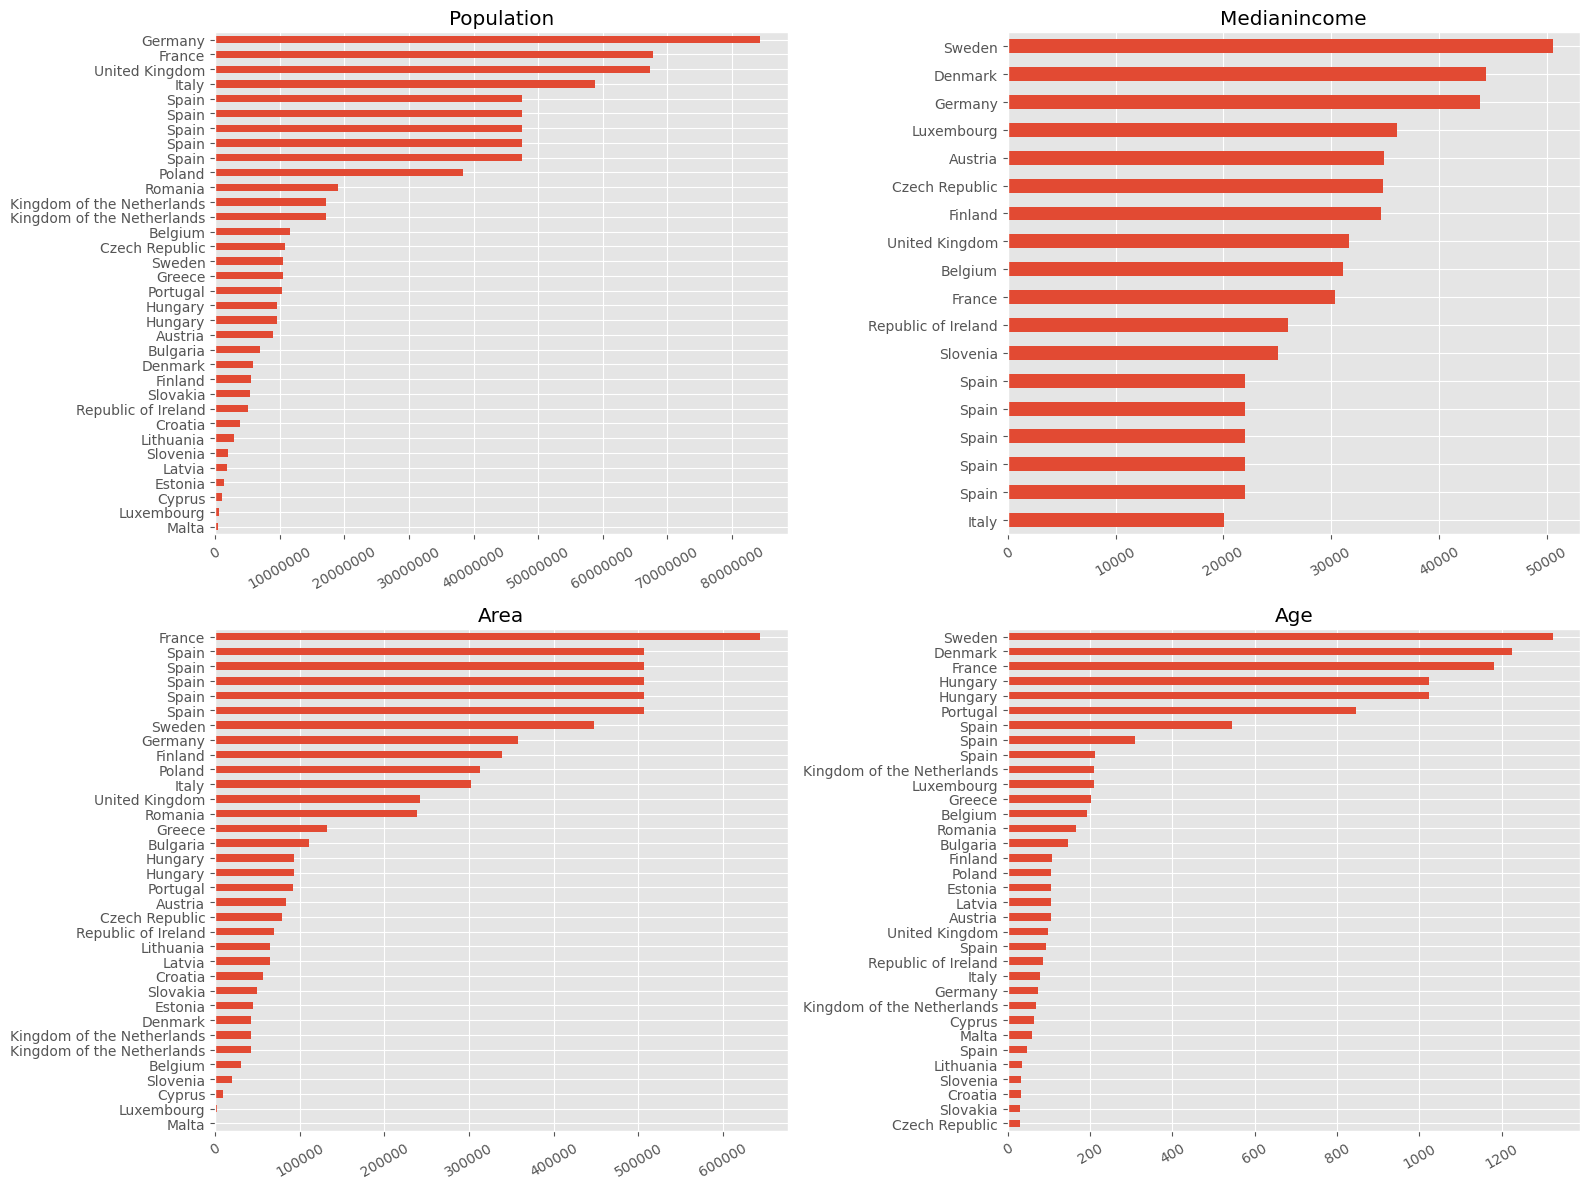

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(16, 12))
for i, label in enumerate(['population', 'medianIncome', 'area', 'age']):
    plt.subplot(2, 2, i + 1)
    df_plot = df[label].sort_values().dropna()
    df_plot.plot(kind='barh', color='C0', ax=plt.gca());
    plt.ylabel('')
    plt.xticks(rotation=30)
    plt.title(label.capitalize())
    plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()